# Assessment Problems

## Imports

In [2]:
# Date and time handling
import datetime as dt

# Data manipulation
import pandas as pd

# Yahoo Finance data
import yfinance as yf

# Plotting
import matplotlib.pyplot as plt

# Listing files in a folder
import os

## Problem 1: Data from yfinance

This project relies on market data obtained through the `yfinance` library (see the [project homepage](https://github.com/ranaroussi/yfinance)), which is on open-source tool that allowes us to fetch and download financial data from Yahoo Finance. 

In [ ]:
# Fetch stocks tickers for analysis
tickers = yf.Tickers('META AAPL AMZN NFLX GOOG')

# Display tickers
tickers

yfinance.Tickers object <META,AAPL,AMZN,NFLX,GOOG>

### Configure filename

To create a descriptive filename, we need to obtain today's date. We will use `now()` classmethod within `datetime` module (see the [oficcial documentation](https://docs.python.org/3/library/datetime.html#datetime.datetime)). `now()` allows to get current local date and time. 

In [4]:
# Get today's date 
now = dt.datetime.now()

# Display today's date
now

datetime.datetime(2025, 11, 29, 14, 45, 49, 448321)

To format the date and time for use in filenames, we apply the `strftime()` method. Refer to the Python [official format code ducumentation](https://docs.python.org/3/library/datetime.html#format-codes) for the complete list of options.

To configure a filename as `YYYYMMDD-HHmmss.csv`, we can combine the four-digit year, month, and day directives with a dash, followed by zero-padded hour, minute and second directives.

In [5]:
# Format date and time
now.strftime("%Y%m%d-%H%M%S")

'20251129-144549'

Setting the filename involves three steps:
1. **Specify the folder path**. Since the `data` folder is in the same directory as this notebook, we can refer to it directly by name. Therefore, the path to the folder is `data/`.
2. **Generate a timestamp**. Use `datetime.now()` and format it with `strftime()` to produce the `YYYYMMDD-HHmmss` pattern.
3. **Add the `.csv` extension**. This indicates the file format and makes it easily recognisable as a CSV file.

In [ ]:
# Create a filename including path and formatted date-time
filename = 'data/' + dt.datetime.now().strftime('%Y%m%d-%H%M%S') + '.csv'

# Display filename
filename

'data/20251129-144549.csv'

### Download data and create a DataFrame

We will use the `yf.download()` function (see the [official documentation](https://ranaroussi.github.io/yfinance/reference/api/yfinance.download.html#yfinance.download)) to download market data for the last 5 days for the tickers META, AAPL, AMZN, NFLX, GOOG. The result is stored in a [Pandas DataFrame](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html). 

In [ ]:
# Create a dataframe and download historical data 
# Period specifies the total duration of data to fetch
# Interval specifies the frequency of data points
df = yf.download(('META AAPL AMZN NFLX GOOG'), period='5D', interval='1h')

# Display the first 3 rows of the data
print(df.head(3))

/tmp/ipykernel_22970/3456727915.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(('META AAPL AMZN NFLX GOOG'), period='5D', interval='1h')
[*********************100%***********************]  5 of 5 completed

Price                           Close                                      \
Ticker                           AAPL        AMZN        GOOG        META   
Datetime                                                                    
2025-11-21 14:30:00+00:00  269.850006  216.264999  296.760010  585.119995   
2025-11-21 15:30:00+00:00  270.899994  218.574997  300.329987  587.742676   
2025-11-21 16:30:00+00:00  270.549988  219.639999  296.489990  592.979980   

Price                                        High                          \
Ticker                           NFLX        AAPL        AMZN        GOOG   
Datetime                                                                    
2025-11-21 14:30:00+00:00  105.889999  270.450012  217.910004  301.920013   
2025-11-21 15:30:00+00:00  105.239998  271.470001  218.610001  301.829987   
2025-11-21 16:30:00+00:00  105.220001  271.119995  220.723007  300.375000   

Price                                              ...        Open  \
Tick

### Automate the process by creating a function

We can now combine the steps above into a single function that downloads hourly market data for the previous five days for the five FAANG stocks.

In [8]:
# Function to get data and save to CSV
def get_data():
    """Download data and save to CSV file."""
    # Get historical data for the last 5 days
    df = yf.download(('META AAPL AMZN NFLX GOOG'), period='5D', interval='1h')
    # Create a filename with the current date and time
    filename = 'data/' + dt.datetime.now().strftime('%Y%m%d-%H%M%S') + '.csv'
    # Save data to CSV
    df.to_csv(filename)
    # Return the dataframe
    return df

# Call the function to get data and save to CSV
faang_df = get_data()

/tmp/ipykernel_22970/2287664972.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(('META AAPL AMZN NFLX GOOG'), period='5D', interval='1h')


[*********************100%***********************]  5 of 5 completed


## Problem 2 - Plotting Data

To visualize the data, we can use the plotting capabilities of the `Matplotlib` library and save the resulting figure using the `matplotlib.pyplot.savefig` method (see the [official documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html)). In this step, we specify the path to the `plots/` directory in the root of the repository, choose a file name, and save the figure in `.png` format. 

We can also control the image quality by adjusting the `dpi` parameter; however, we should keep in mind that higher-quality images require more storage space.

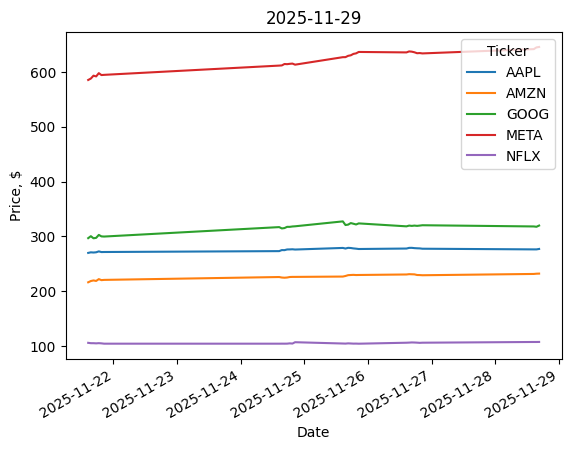

In [ ]:
# Create a figure and axis for customized plotting
fig, ax = plt.subplots()

# Create a plot, passing the axis
df['Close'].plot(ax=ax)

# Set title as date
ax.set_title(now.strftime('%Y-%m-%d'))
# Set x axis label
ax.set_xlabel('Date')
# Set y axis label
ax.set_ylabel('Price, $')

# Get today's date for figure naming
now = dt.datetime.now()
# Create a figure name with the current date in .png format
figure_name =  'plots/' + dt.datetime.now().strftime('%Y%m%d-%H%M%S') + '.png'

# Save the plot to a folder
# The dpi parameter sets the resolution of the saved figure
fig.savefig(figure_name, dpi = 300)

### Accessing `.csv` files in the `data` folder

Since `.png` files can be large, we only want to visualize the data from the most recent `.csv` file downloaded earlier. To do this, we first need to access the files stored in the `data` directory and sort them.

We can list the files in the directory using the `os.listdir()` method (see the [official documentation](https://docs.python.org/3/library/os.html)), which returns all files and folders in the specified path. [GeeksforGeeks guide](https://www.geeksforgeeks.org/python/python-os-listdir-method/) provides additional usage examples. 

In [16]:
# List files in the 'data' folder
data_files = os.listdir('data')

# Display the list of files
data_files

['20251122-074415.csv',
 '20251122-145340.csv',
 '20251129-144550.csv',
 '20251121-091135.csv',
 '20251122-145825.csv',
 '20251116-212737.csv',
 '20251129-135852.csv',
 '20251116-212751.csv',
 '20251122-154852.csv',
 '20251122-072955.csv',
 '20251129-135851.csv',
 '20251116-213617.csv',
 '20251117-085407.csv',
 '20251122-072330.csv',
 '20251117-090600.csv',
 '20251117-085418.csv']

### Sort files
There are a few ways to sort file names, and here we will use the `list.sort()` method (see the [official documentation](https://docs.python.org/3/howto/sorting.html)). This method sorts the list in place. By setting the parameter `reverse=True`, we sort the list descending order, which places the most recent file at the beginning.

In [18]:
# Sort files by name in descending order
data_files.sort(reverse=True) 

# Display sorted list of files
data_files

['20251129-144550.csv',
 '20251129-135852.csv',
 '20251129-135851.csv',
 '20251122-154852.csv',
 '20251122-145825.csv',
 '20251122-145340.csv',
 '20251122-074415.csv',
 '20251122-072955.csv',
 '20251122-072330.csv',
 '20251121-091135.csv',
 '20251117-090600.csv',
 '20251117-085418.csv',
 '20251117-085407.csv',
 '20251116-213617.csv',
 '20251116-212751.csv',
 '20251116-212737.csv']

In [21]:
# Pass index 0 to get the most recent file
data_files[0]

'20251129-144550.csv'

# End